# Cost Function minimization

### 1. 1차원 회귀

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
X = [1,2,3]
Y = [2,4,6]

W = tf.placeholder(tf.float32)

hypothesis = X*W

In [17]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [18]:
sess = tf.Session()

In [19]:
sess.run(tf.global_variables_initializer())

In [20]:
W_val = []
cost_val = []

In [21]:
for i in range(-50, 50):
    feed_W = i * 0.05 # learning rate
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

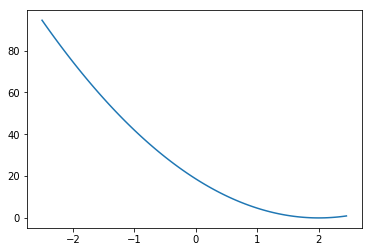

In [22]:
plt.plot(W_val, cost_val)
plt.show()

W값(기울기) 2에서 비용함수가 최소가 됨을 알 수 있음

### 2. 다차원 회귀

#### H = XW + b, H W X b는 모두 다차원 텐서

In [23]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [24]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
opt = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = opt.minimize(cost)

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
cost_list = []
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    cost_list.append(cost_val)
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  14423.203 
Prediction:
 [264.17468 308.46414 308.8366  334.30597 234.53133]
10 Cost:  17.467787 
Prediction:
 [157.98325 180.86046 183.09064 197.3737  137.20784]
20 Cost:  17.2435 
Prediction:
 [157.64587 180.4854  182.70526 196.95593 136.92775]
30 Cost:  17.151701 
Prediction:
 [157.62883 180.49524 182.69917 196.95123 136.9412 ]
40 Cost:  17.060299 
Prediction:
 [157.61281 180.50623 182.69424 196.94778 136.95554]
50 Cost:  16.969473 
Prediction:
 [157.5968  180.51717 182.68932 196.94434 136.96977]
60 Cost:  16.879017 
Prediction:
 [157.58084 180.52809 182.6844  196.9409  136.98402]
70 Cost:  16.78916 
Prediction:
 [157.56494 180.53899 182.67952 196.9375  136.99821]
80 Cost:  16.699759 
Prediction:
 [157.5491  180.54987 182.67465 196.9341  137.01239]
90 Cost:  16.610851 
Prediction:
 [157.53325 180.56067 182.66978 196.9307  137.02649]
100 Cost:  16.52235 
Prediction:
 [157.51747 180.5715  182.66493 196.9273  137.04057]
110 Cost:  16.43443 
Prediction:
 [157.50174 180.58226 182

980 Cost:  10.348631 
Prediction:
 [156.2833  181.41653 182.28543 196.66301 138.14091]
990 Cost:  10.294012 
Prediction:
 [156.2709  181.42505 182.28162 196.66039 138.15198]
1000 Cost:  10.2396755 
Prediction:
 [156.25851 181.4335  182.27779 196.65773 138.163  ]
1010 Cost:  10.185715 
Prediction:
 [156.24619 181.44194 182.274   196.65512 138.17398]
1020 Cost:  10.131965 
Prediction:
 [156.23389 181.45038 182.27022 196.65248 138.18495]
1030 Cost:  10.078508 
Prediction:
 [156.2216  181.45879 182.26643 196.64987 138.19588]
1040 Cost:  10.025395 
Prediction:
 [156.20937 181.46716 182.26266 196.64725 138.20676]
1050 Cost:  9.972499 
Prediction:
 [156.19714 181.47551 182.2589  196.64464 138.21764]
1060 Cost:  9.919942 
Prediction:
 [156.18498 181.48386 182.25517 196.64206 138.22849]
1070 Cost:  9.86767 
Prediction:
 [156.17284 181.49216 182.25143 196.63947 138.23929]
1080 Cost:  9.815615 
Prediction:
 [156.16074 181.50047 182.24771 196.6369  138.25009]
1090 Cost:  9.763915 
Prediction:
 [15

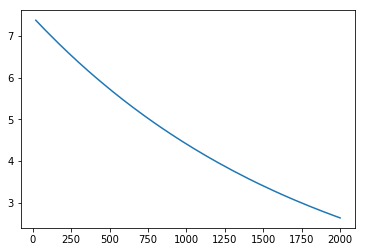

In [36]:
plt.plot(range(20,2001), cost_list[20:])
plt.show()

#### 이젠 matrix로 표시해보자.

In [28]:
import numpy as np

In [42]:
x_data = np.array([[73., 80., 75.], [93., 88., 93.],[89., 91., 90.], [96., 98., 100.], [73., 66., 70.]])
y_data = np.array([[152.], [185.], [180.], [196.], [142.]])

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hyp = tf.matmul(X, W) + b

* X * W = (5,1)행렬이므로. 크기 맞추자

In [30]:
cost = tf.reduce_mean(tf.square(hyp - Y))
opt = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
cost_list = []
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hyp, train], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost_val)
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  18024.8 
Prediction:
 [[28.781063]
 [44.018795]
 [38.455044]
 [41.343594]
 [36.58736 ]]
10 Cost:  7.5817475 
Prediction:
 [[147.53244]
 [186.72937]
 [179.08046]
 [194.48007]
 [145.43558]]
20 Cost:  7.377645 
Prediction:
 [[147.90213]
 [187.15404]
 [179.50911]
 [194.9458 ]
 [145.75546]]
30 Cost:  7.3387136 
Prediction:
 [[147.91359]
 [187.1482 ]
 [179.51355]
 [194.94958]
 [145.74701]]
40 Cost:  7.2999907 
Prediction:
 [[147.92397]
 [187.14108]
 [179.51672]
 [194.95197]
 [145.73761]]
50 Cost:  7.261496 
Prediction:
 [[147.9343 ]
 [187.134  ]
 [179.5199 ]
 [194.95435]
 [145.72823]]
60 Cost:  7.2231917 
Prediction:
 [[147.9446 ]
 [187.12692]
 [179.52303]
 [194.95671]
 [145.71886]]
70 Cost:  7.1851015 
Prediction:
 [[147.95488]
 [187.11987]
 [179.52617]
 [194.95909]
 [145.70953]]
80 Cost:  7.147223 
Prediction:
 [[147.96512]
 [187.11285]
 [179.5293 ]
 [194.96146]
 [145.70021]]
90 Cost:  7.1095552 
Prediction:
 [[147.97534]
 [187.10583]
 [179.53241]
 [194.96379]
 [145.69093]]
100 Co

1320 Cost:  3.73518 
Prediction:
 [[149.04216]
 [186.37332]
 [179.85777]
 [195.21074]
 [144.71991]]
1330 Cost:  3.7159393 
Prediction:
 [[149.04945]
 [186.36832]
 [179.86   ]
 [195.21245]
 [144.71327]]
1340 Cost:  3.6968102 
Prediction:
 [[149.0567 ]
 [186.36331]
 [179.86221]
 [195.21414]
 [144.70663]]
1350 Cost:  3.6777244 
Prediction:
 [[149.064  ]
 [186.35834]
 [179.86443]
 [195.21585]
 [144.70003]]
1360 Cost:  3.6587996 
Prediction:
 [[149.0712 ]
 [186.35335]
 [179.86662]
 [195.21753]
 [144.69342]]
1370 Cost:  3.6399696 
Prediction:
 [[149.07841]
 [186.3484 ]
 [179.86884]
 [195.2192 ]
 [144.68684]]
1380 Cost:  3.621241 
Prediction:
 [[149.08562]
 [186.34348]
 [179.87102]
 [195.22089]
 [144.6803 ]]
1390 Cost:  3.6025872 
Prediction:
 [[149.09279]
 [186.33855]
 [179.8732 ]
 [195.22256]
 [144.67374]]
1400 Cost:  3.584063 
Prediction:
 [[149.09995]
 [186.33363]
 [179.87538]
 [195.22423]
 [144.66722]]
1410 Cost:  3.5656388 
Prediction:
 [[149.10707]
 [186.32874]
 [179.87755]
 [195.22588

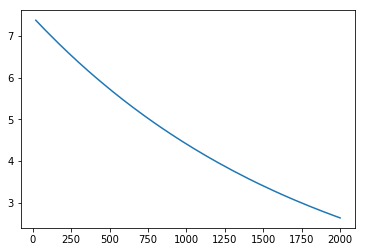

In [38]:
plt.plot(range(20,2001), cost_list[20:])
plt.show()

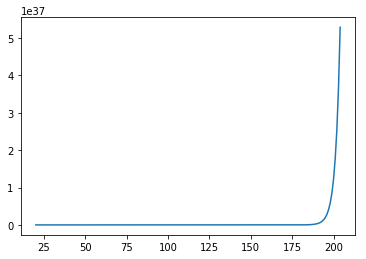

In [50]:
cost = tf.reduce_mean(tf.square(hyp - Y))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.00005)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_list = []
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hyp, train], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost_val)

plt.plot(range(20,2001), cost_list[20:])
plt.show()    

In [45]:
print(cost_list)

[128305.75, 56612930.0, 24982553000.0, 11024479000000.0, 4864961000000000.0, 2.1468448e+18, 9.473754e+20, 4.180646e+23, 1.8448657e+26, 8.141157e+28, 3.5925878e+31, 1.5853632e+34, 6.996005e+36, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

* learning rate가 지나치게 크면(0.05라든지..) 발산한다. 이유는 모르겠고..